## Decision Tree and Random Forest classification models training (Phishing)

In [ ]:
"""
Phishing Decision Tree and Random Forest TF-IDF-based classification models
"""
__author__ = "Alisher Mazhirinov"

In [9]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

## Load datasets

In [10]:
phishing = pd.read_csv('6_final_feature_extraction/phishing_word_count.csv')
benign = pd.read_csv('6_final_feature_extraction/benignPhishing_word_count.csv')

In [11]:
exclude_cols = ['domain_name','label','language','malicious_tags','all_tags','word_count','domain_length']
phishing_cols = [col for col in phishing.columns if col not in exclude_cols]
# Calculate the sum of all tf-idf features
phishing['tfidf_phishing_total'] = phishing[phishing_cols].sum(axis=1)
# Delete rows with zero values
phishing = phishing[phishing['tfidf_phishing_total'] > 0].reset_index(drop=True)
phishing

,domain_name,label,language,malicious_tags,all_tags,word_count,domain_length,posts,profile,visit,...,events,view,news,best,find,online,read,standard,school,tfidf_phishing_total
0,fbgch.blogspot.fi,1,en,1,99,26,17,1,1,1,...,0,0,0,0,0,0,0,0,0,9
1,rjymb.blogspot.hr,1,en,1,99,26,17,1,1,1,...,0,0,0,0,0,0,0,0,0,9
2,spst3.mjt.lu,1,en,1,23,115,12,0,0,0,...,0,0,0,1,0,0,0,0,0,10
3,rmtjy.blogspot.am,1,en,1,99,26,17,1,1,1,...,0,0,0,0,0,0,0,0,0,9
4,bigbangmanifesto.com,1,en,8,341,905,20,0,0,0,...,0,0,0,3,0,0,2,0,0,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6729,bionicwebdesign.com,1,en,11,403,799,19,1,0,0,...,0,0,0,4,1,1,0,1,0,41
6730,procurerest.s3-tastewp.com,1,en,10,2982,7608,26,2,11,4,...,0,0,0,1,3,1,3,0,0,1076
6731,www.dms-mining.com.na,1,en,22,473,244,21,0,0,0,...,0,3,0,0,0,0,0,0,0,17
6732,d271eg8bg145b3.cloudfront.net,1,en,8,394,747,29,0,0,1,...,0,2,3,0,3,2,0,0,0,80


In [12]:
# Do the same with benign dataset
benign_cols = [col for col in benign.columns if col not in exclude_cols]
benign['tfidf_phishing_total'] = benign[benign_cols].sum(axis=1)
benign = benign[benign['tfidf_phishing_total'] > 0].reset_index(drop=True)
# Make benign dataset contain the same amount of features as in malware dataset
benign = benign.head(6734).reset_index(drop=True)
benign

,domain_name,label,language,malicious_tags,all_tags,word_count,domain_length,posts,profile,visit,...,events,view,news,best,find,online,read,standard,school,tfidf_phishing_total
0,portal.ife.ugo.aero,0,en,4,28,86,19,0,0,0,...,0,0,0,0,0,0,0,0,0,6
1,pressbooks.pub,0,en,4,136,120,14,0,0,1,...,0,0,0,0,0,0,0,0,0,18
2,arcs-praha-ds.cz2.quickconnect.to,0,en,1,59,277,33,0,0,0,...,0,0,0,0,0,0,0,0,0,18
3,blue-mail-email-exchange.apk.cafe,0,en,2,2962,4776,33,0,0,0,...,4,4,4,2,2,1,0,0,0,194
4,aca2023.iit.sggw.pl,0,en,12,480,325,19,0,0,0,...,0,0,1,1,0,0,0,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6729,viewfrom.earth,0,en,8,628,619,14,0,0,0,...,0,0,0,0,0,0,0,0,0,5
6730,waterways.ltd.uk,0,en,10,670,699,16,0,0,1,...,0,0,0,0,1,1,0,0,0,46
6731,warma.org.zm,0,en,12,701,607,12,1,0,1,...,0,0,1,2,1,0,0,0,0,31
6732,viking-appliance.repair,0,en,22,707,1286,23,1,0,1,...,0,2,0,4,2,0,0,0,0,48


In [13]:
# Concatenate two datasets
combined_df = pd.concat([phishing, benign], ignore_index=True)
# Shuffle them in random order
shuffled_df = combined_df.sample(frac=1, random_state=42).reset_index(drop=True)
shuffled_df

,domain_name,label,language,malicious_tags,all_tags,word_count,domain_length,posts,profile,visit,...,events,view,news,best,find,online,read,standard,school,tfidf_phishing_total
0,drx.works,0,en,4,474,293,9,0,0,0,...,0,0,1,0,2,0,0,0,0,12
1,briefly.co.za,0,en,7,1272,1614,13,0,0,1,...,0,1,4,2,0,1,13,0,2,41
2,bafybeibzkqukq26eelwvcna2gnl2nhxhlbrizj6s7rupo...,1,en,6,46,27,74,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,shaheedfoundation.org.pk,1,en,1,19,16,24,0,0,0,...,0,0,0,0,0,0,0,0,0,5
4,siroko.bike,0,en,6,3842,2338,11,0,0,0,...,0,0,2,0,0,0,0,0,0,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13463,bangla52globalbrand.com,1,en,1,19,16,23,0,0,0,...,0,0,0,0,0,0,0,0,0,5
13464,tpf.legal,0,en,23,358,573,9,1,0,0,...,0,0,0,1,0,0,0,0,0,24
13465,treatsbytesayold.firebaseapp.com,1,en,1,7,14,32,0,0,0,...,0,0,0,0,0,0,0,0,0,2
13466,ladyrareapepeyc.com,1,en,31,911,905,19,0,0,0,...,0,0,0,0,0,0,0,0,0,12


In [14]:
# Delete all unnecessary features + overfitted features
shuffled_df = shuffled_df.drop(columns=['language', 'domain_name', 'word_count', 'domain_length', 'all_tags', 
                                         'contact', 'new', 'news',
                                         'privacy', 'policy', 'support',
                                         'help',
                                         'malicious_tags', 'tfidf_phishing_total'])
#shuffled_df.to_csv('7_output_files/main_bp_dataset.csv', index=False)

## Random Forest and Decision Tree models

In [15]:
y = shuffled_df['label']
X = shuffled_df.drop(['label'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

# Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)


y_pred_dt = dt_model.predict(X_test)


print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))

Random Forest Accuracy: 0.884682009403613
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.95      0.89      2025
           1       0.95      0.82      0.88      2016

    accuracy                           0.88      4041
   macro avg       0.89      0.88      0.88      4041
weighted avg       0.89      0.88      0.88      4041

Decision Tree Accuracy: 0.8245483791140806
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.79      0.82      2025
           1       0.80      0.86      0.83      2016

    accuracy                           0.82      4041
   macro avg       0.83      0.82      0.82      4041
weighted avg       0.83      0.82      0.82      4041



## Printing feature importance

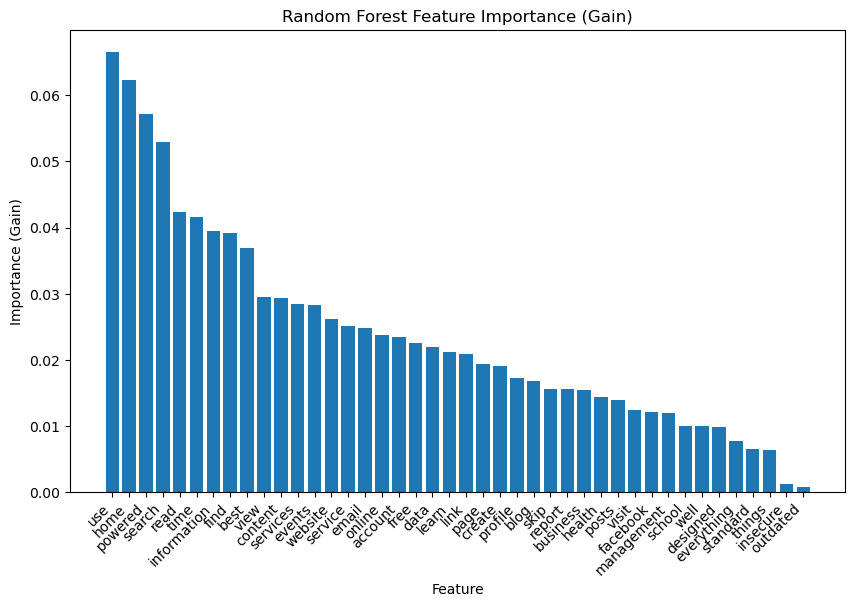

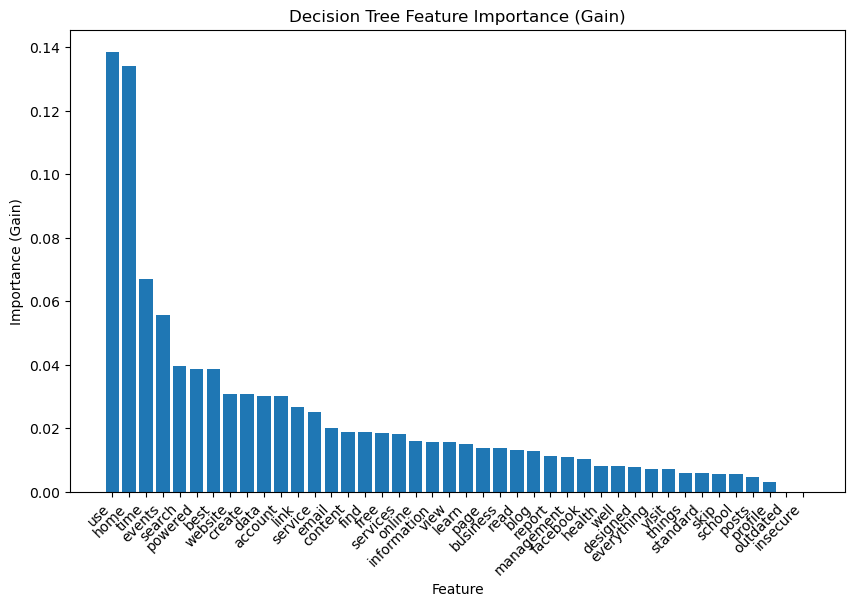

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Feature Importance using Gain (MDI - Mean Decrease in Impurity)
def plot_feature_importance_gain(model, feature_names, title):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    
    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.bar(range(len(feature_names)), importances[indices], align="center")
    plt.xticks(range(len(feature_names)), np.array(feature_names)[indices], rotation=45, ha="right")
    plt.xlabel("Feature")
    plt.ylabel("Importance (Gain)")
    plt.show()

# Plot Gain-based Feature Importance for Random Forest
plot_feature_importance_gain(rf_model, X.columns, "Random Forest Feature Importance (Gain)")

# Plot Gain-based Feature Importance for Decision Tree
plot_feature_importance_gain(dt_model, X.columns, "Decision Tree Feature Importance (Gain)")


In [17]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from optuna.integration import OptunaSearchCV
import optuna

## Grid Search

In [18]:
# Hyperparameter Tuning for RandomForest (Grid Search)
rf_param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, cv=5, scoring='accuracy')
rf_grid_search.fit(X_train, y_train)

best_rf_params = rf_grid_search.best_params_
print("Best parameters for RandomForest (Grid Search):", best_rf_params)

# Training RandomForest with Best Parameters
rf_optimized_grid = RandomForestClassifier(**best_rf_params, random_state=42)
rf_optimized_grid.fit(X_train, y_train)

y_pred_rf = rf_optimized_grid.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

Best parameters for RandomForest (Grid Search): {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}
Random Forest Accuracy: 0.8831972284088097
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.96      0.89      2025
           1       0.95      0.81      0.87      2016

    accuracy                           0.88      4041
   macro avg       0.89      0.88      0.88      4041
weighted avg       0.89      0.88      0.88      4041



In [19]:
# Hyperparameter Tuning for DecisionTree (Grid Search)
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

dt_grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_param_grid, cv=5, scoring='accuracy')
dt_grid_search.fit(X_train, y_train)

best_dt_params = dt_grid_search.best_params_
print("Best parameters for DecisionTree (Grid Search):", best_dt_params)

# Training DecisionTree with Best Parameters
dt_optimized_grid = DecisionTreeClassifier(**best_dt_params, random_state=42)
dt_optimized_grid.fit(X_train, y_train)

y_pred_dt = dt_optimized_grid.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))

Best parameters for DecisionTree (Grid Search): {'criterion': 'gini', 'max_depth': 15, 'min_samples_split': 10}
Decision Tree Accuracy: 0.8294976490967583
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83      2025
           1       0.83      0.82      0.83      2016

    accuracy                           0.83      4041
   macro avg       0.83      0.83      0.83      4041
weighted avg       0.83      0.83      0.83      4041



## Optuna Search

In [20]:
# Optimization with Optuna for RandomForest
rf = RandomForestClassifier(random_state=42)
rf_param_dist = {
    'n_estimators': optuna.distributions.IntDistribution(50, 200),
    'max_depth': optuna.distributions.IntDistribution(5, 30),
    'min_samples_split': optuna.distributions.IntDistribution(2, 10)
}

optuna_rf_search = OptunaSearchCV(rf, rf_param_dist, cv=5, scoring='accuracy', n_trials=12)
optuna_rf_search.fit(X_train, y_train)

best_rf_optuna_params = optuna_rf_search.best_params_
print("Best parameters for RandomForest (Optuna Search):", best_rf_optuna_params)

# Training RandomForest with Best Parameters
rf_optimized = RandomForestClassifier(**best_rf_optuna_params, random_state=42)
rf_optimized.fit(X_train, y_train)

y_pred_rf = rf_optimized.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

C:\Users\mazhirinova\AppData\Local\Temp\ipykernel_25588\421955803.py:9: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
  optuna_rf_search = OptunaSearchCV(rf, rf_param_dist, cv=5, scoring='accuracy', n_trials=12)
[I 2025-05-08 14:01:06,718] A new study created in memory with name: no-name-b77b4d6d-5e8f-4569-b637-23a634906cac
[I 2025-05-08 14:01:10,157] Trial 0 finished with value: 0.8637957756581371 and parameters: {'n_estimators': 92, 'max_depth': 12, 'min_samples_split': 8}. Best is trial 0 with value: 0.8637957756581371.
[I 2025-05-08 14:01:14,481] Trial 1 finished with value: 0.8786466804121392 and parameters: {'n_estimators': 91, 'max_depth': 27, 'min_samples_split': 6}. Best is trial 1 with value: 0.8786466804121392.
[I 2025-05-08 14:01:23,294] Trial 2 finished with value: 0.87885910703185 and parameters: {'n_estimators': 184, 'max_depth': 25, 'min_samples_split': 4}. Best is trial 2 with value: 0.878859107031

Best parameters for RandomForest (Optuna Search): {'n_estimators': 77, 'max_depth': 26, 'min_samples_split': 2}
Random Forest Accuracy: 0.8844345459044791
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.95      0.89      2025
           1       0.94      0.82      0.88      2016

    accuracy                           0.88      4041
   macro avg       0.89      0.88      0.88      4041
weighted avg       0.89      0.88      0.88      4041



In [21]:
# Optimization with Optuna for DecisionTree
dt = DecisionTreeClassifier(random_state=42)
dt_param_dist = {
    'max_depth': optuna.distributions.IntDistribution(5, 30),
    'min_samples_split': optuna.distributions.IntDistribution(2, 10)
}

optuna_dt_search = OptunaSearchCV(dt, dt_param_dist, cv=5, scoring='accuracy', n_trials=15)
optuna_dt_search.fit(X_train, y_train)

best_dt_optuna_params = optuna_dt_search.best_params_
print("Best parameters for DecisionTree (Optuna Search):", best_dt_optuna_params)

# Training DecisionTree with Best Parameters
dt_optimized = DecisionTreeClassifier(**best_dt_optuna_params, random_state=42)
dt_optimized.fit(X_train, y_train)

y_pred_dt = dt_optimized.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))

C:\Users\mazhirinova\AppData\Local\Temp\ipykernel_25588\386239540.py:8: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
  optuna_dt_search = OptunaSearchCV(dt, dt_param_dist, cv=5, scoring='accuracy', n_trials=15)
[I 2025-05-08 14:02:15,104] A new study created in memory with name: no-name-e587c683-7a3a-4673-ae53-9260fefb9e5c
[I 2025-05-08 14:02:15,384] Trial 0 finished with value: 0.8288968273836815 and parameters: {'max_depth': 21, 'min_samples_split': 6}. Best is trial 0 with value: 0.8288968273836815.
[I 2025-05-08 14:02:15,628] Trial 1 finished with value: 0.8312300885204678 and parameters: {'max_depth': 15, 'min_samples_split': 3}. Best is trial 1 with value: 0.8312300885204678.
[I 2025-05-08 14:02:15,818] Trial 2 finished with value: 0.8286823755101811 and parameters: {'max_depth': 9, 'min_samples_split': 2}. Best is trial 1 with value: 0.8312300885204678.
[I 2025-05-08 14:02:16,063] Trial 3 finished with valu

Best parameters for DecisionTree (Optuna Search): {'max_depth': 15, 'min_samples_split': 3}
Decision Tree Accuracy: 0.8314773570898293
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83      2025
           1       0.83      0.83      0.83      2016

    accuracy                           0.83      4041
   macro avg       0.83      0.83      0.83      4041
weighted avg       0.83      0.83      0.83      4041

